In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('fraud_detection_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df.describe()


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [5]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [6]:
# Drop rows with missing values (if any)
df.dropna(inplace=True)

In [7]:

# Convert 'trans_date_trans_time' to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])


In [8]:
#Data Preprocessing
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day'] = df['trans_date_trans_time'].dt.day
df['month'] = df['trans_date_trans_time'].dt.month
df['year'] = df['trans_date_trans_time'].dt.year
df = pd.get_dummies(df, columns=['category', 'gender', 'state', 'job'], drop_first=True)


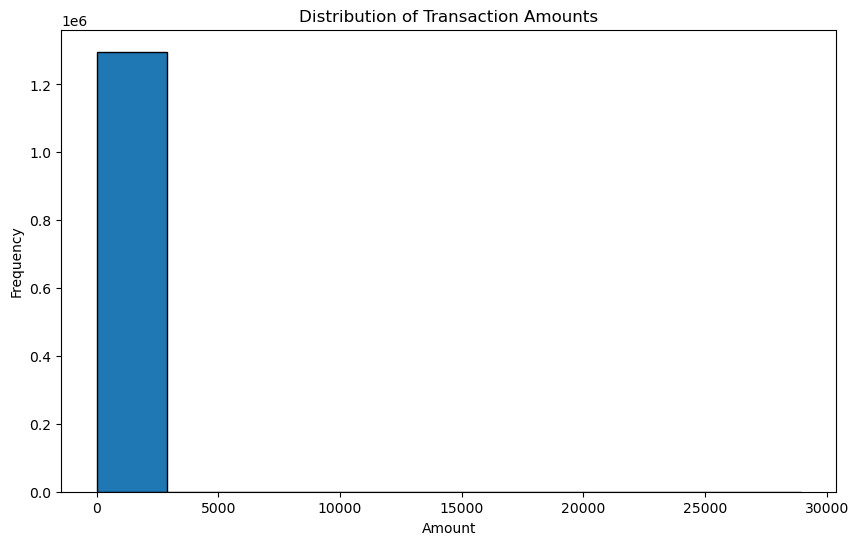

In [27]:
# Create a histogram of the 'amt' column
plt.figure(figsize=(10, 6))
plt.hist(df['amt'], bins=10, edgecolor='black')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
plt.show()

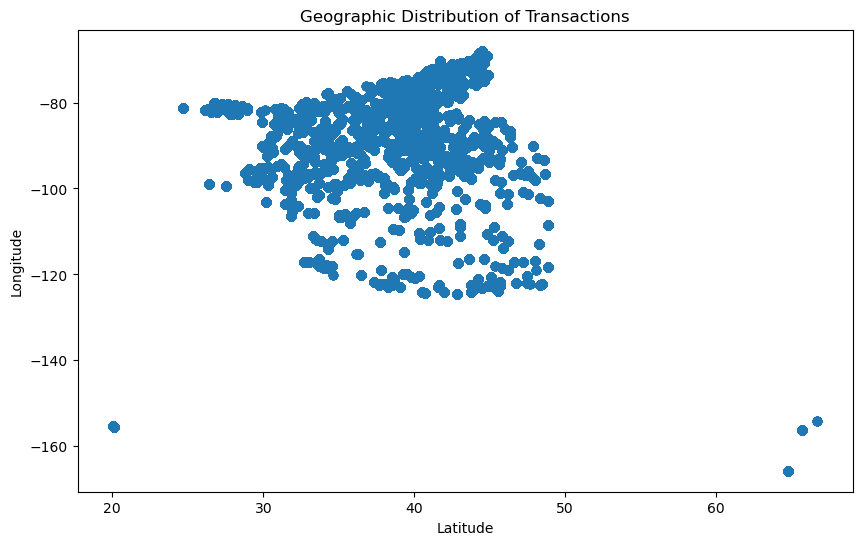

In [28]:
# Create a scatter plot of 'lat' vs 'long'
plt.figure(figsize=(10, 6))
plt.scatter(df['lat'], df['long'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Geographic Distribution of Transactions')
plt.show()

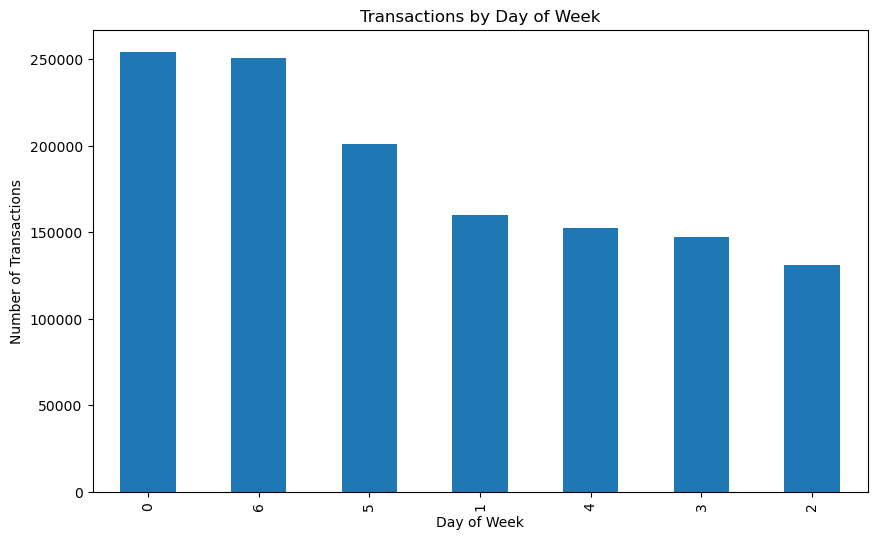

In [29]:
# Create a bar chart of the number of transactions per day of the week
plt.figure(figsize=(10, 6))
df['day_of_week'].value_counts().plot(kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Number of Transactions')
plt.title('Transactions by Day of Week')
plt.show()


In [11]:
# Check for non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['merchant', 'first', 'last', 'street', 'city', 'dob', 'trans_num'], dtype='object')


In [12]:

# Alternative Feature Engineering
# Calculate Euclidean Distance
df['distance'] = np.sqrt((df['lat'] - df['merch_lat'])**2 + (df['long'] - df['merch_long'])**2)

# Time-Based Features
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
df['week_of_year'] = df['trans_date_trans_time'].dt.isocalendar().week
df['is_weekend'] = df['trans_date_trans_time'].dt.dayofweek > 4

# Transaction Amount Aggregation
df['mean_transaction_amt'] = df.groupby('cc_num')['amt'].transform('mean')
df['std_transaction_amt'] = df.groupby('cc_num')['amt'].transform('std')
df['min_transaction_amt'] = df.groupby('cc_num')['amt'].transform('min')
df['max_transaction_amt'] = df.groupby('cc_num')['amt'].transform('max')

# Frequency-Based Features
df['day'] = df['trans_date_trans_time'].dt.date
df['week'] = df['trans_date_trans_time'].dt.isocalendar().week
df['month'] = df['trans_date_trans_time'].dt.month

df['transactions_last_day'] = df.groupby(['cc_num', 'day'])['amt'].transform('count')
df['transactions_last_week'] = df.groupby(['cc_num', 'week'])['amt'].transform('count')
df['transactions_last_month'] = df.groupby(['cc_num', 'month'])['amt'].transform('count')

# Drop unnecessary columns
df.drop(columns=['trans_date_trans_time', 'first', 'last', 'street', 'city', 'zip', 'dob', 'trans_num', 'unix_time', 'day', 'week', 'month'], inplace=True)


In [13]:
# Identify columns with many unique categories
high_cardinality_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() > 10]
low_cardinality_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() <= 10]

print("High cardinality columns:", high_cardinality_cols)
print("Low cardinality columns:", low_cardinality_cols)

# Apply Label Encoding for high cardinality columns
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in high_cardinality_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Apply One-Hot Encoding for low cardinality columns
df = pd.get_dummies(df, columns=low_cardinality_cols, drop_first=True)

# Verify if all columns are now numeric
print("New data types:\n", df.dtypes)


High cardinality columns: ['merchant']
Low cardinality columns: []
New data types:
 Unnamed: 0                   int64
cc_num                       int64
merchant                     int32
amt                        float64
lat                        float64
                            ...   
min_transaction_amt        float64
max_transaction_amt        float64
transactions_last_day        int64
transactions_last_week       int64
transactions_last_month      int64
Length: 580, dtype: object


In [18]:
# Randomly sample a smaller subset of the data
df_sampled = df.sample(frac=0.1, random_state=42)  # Adjust the fraction as needed

In [19]:

# Define features and target
X = df_sampled.drop(columns=['is_fraud'])
y = df_sampled['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define features and target
X = df_sampled.drop(columns=['is_fraud'])
y = df_sampled['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

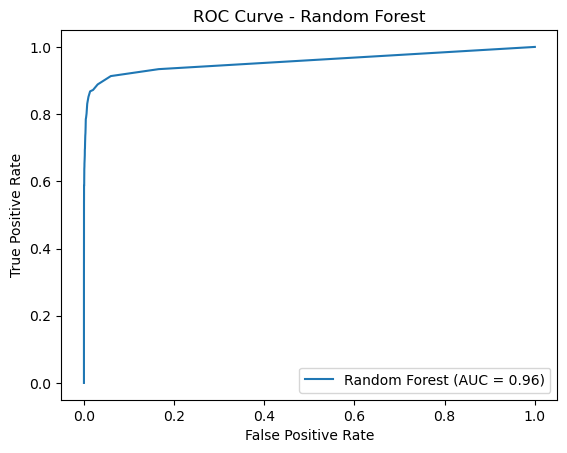

Random Forest Accuracy: 0.995321457031953
Random Forest ROC AUC: 0.9564574893981901
Random Forest Confusion Matrix:
[[38659     0]
 [  182    60]]


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'Random Forest ROC AUC: {roc_auc_rf}')
print(f'Random Forest Confusion Matrix:\n{conf_matrix_rf}')


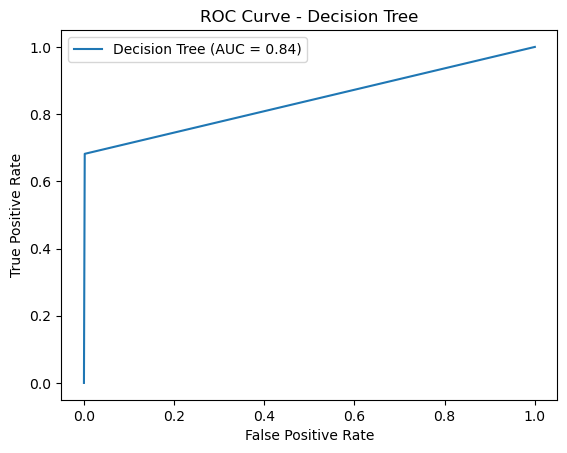

Decision Tree Accuracy: 0.996298295673633
Decision Tree ROC AUC: 0.8400425397825744
Decision Tree Confusion Matrix:
[[38592    67]
 [   77   165]]


In [21]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.show()

print(f'Decision Tree Accuracy: {accuracy_dt}')
print(f'Decision Tree ROC AUC: {roc_auc_dt}')
print(f'Decision Tree Confusion Matrix:\n{conf_matrix_dt}')


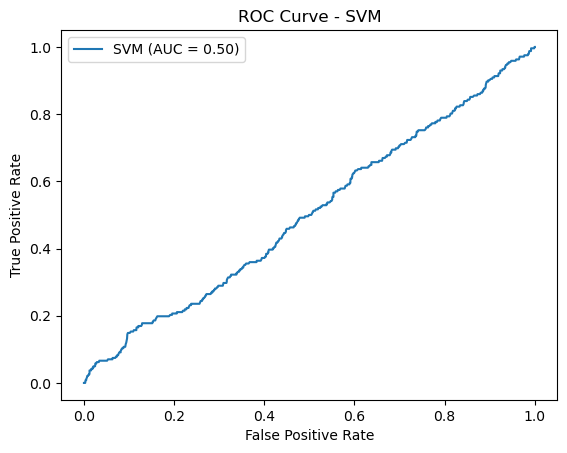

SVM Accuracy: 0.9937790802293001
SVM ROC AUC: 0.5031205781254577
SVM Confusion Matrix:
[[38659     0]
 [  242     0]]


In [23]:
from sklearn.svm import SVC

# Train SVM
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# Evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()

print(f'SVM Accuracy: {accuracy_svm}')
print(f'SVM ROC AUC: {roc_auc_svm}')
print(f'SVM Confusion Matrix:\n{conf_matrix_svm}')


C:\Users\chinm\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


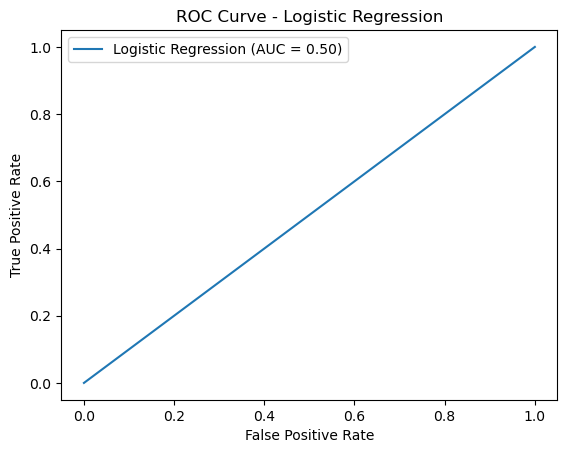

Logistic Regression Accuracy: 0.9937790802293001
Logistic Regression ROC AUC: 0.5
Logistic Regression Confusion Matrix:
[[38659     0]
 [  242     0]]


In [24]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]

# Evaluation
accuracy_lr = accuracy_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

print(f'Logistic Regression Accuracy: {accuracy_lr}')
print(f'Logistic Regression ROC AUC: {roc_auc_lr}')
print(f'Logistic Regression Confusion Matrix:\n{conf_matrix_lr}')


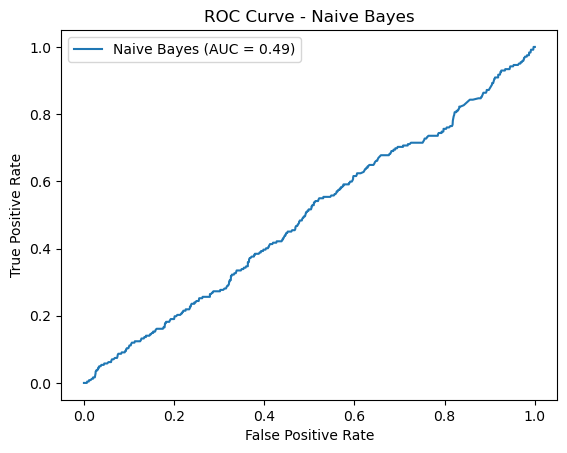

Naive Bayes Accuracy: 0.9937790802293001
Naive Bayes ROC AUC: 0.494237547242375
Naive Bayes Confusion Matrix:
[[38659     0]
 [  242     0]]


In [26]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test)
y_proba_nb = nb_model.predict_proba(X_test)[:, 1]

# Evaluation
accuracy_nb = accuracy_score(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, y_proba_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# ROC Curve
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_proba_nb)
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend()
plt.show()

print(f'Naive Bayes Accuracy: {accuracy_nb}')
print(f'Naive Bayes ROC AUC: {roc_auc_nb}')
print(f'Naive Bayes Confusion Matrix:\n{conf_matrix_nb}')


In [32]:
import pickle

# Assuming 'best_model' is your chosen model
best_model = dt_model  # Example, replace with the actual best model

with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


In [34]:
!pip install streamlit


In [38]:
import pickle

# Assuming 'best_model' is your chosen model
best_model = dt_model  # Example, replace with the actual best model

# Save the model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Save the feature list
feature_list = X_train.columns.tolist()
with open('feature_list.pkl', 'wb') as f:
    pickle.dump(feature_list, f)


In [39]:
feature_list


['Unnamed: 0',
 'cc_num',
 'merchant',
 'amt',
 'lat',
 'long',
 'city_pop',
 'merch_lat',
 'merch_long',
 'hour',
 'year',
 'category_food_dining',
 'category_gas_transport',
 'category_grocery_net',
 'category_grocery_pos',
 'category_health_fitness',
 'category_home',
 'category_kids_pets',
 'category_misc_net',
 'category_misc_pos',
 'category_personal_care',
 'category_shopping_net',
 'category_shopping_pos',
 'category_travel',
 'gender_M',
 'state_AL',
 'state_AR',
 'state_AZ',
 'state_CA',
 'state_CO',
 'state_CT',
 'state_DC',
 'state_DE',
 'state_FL',
 'state_GA',
 'state_HI',
 'state_IA',
 'state_ID',
 'state_IL',
 'state_IN',
 'state_KS',
 'state_KY',
 'state_LA',
 'state_MA',
 'state_MD',
 'state_ME',
 'state_MI',
 'state_MN',
 'state_MO',
 'state_MS',
 'state_MT',
 'state_NC',
 'state_ND',
 'state_NE',
 'state_NH',
 'state_NJ',
 'state_NM',
 'state_NV',
 'state_NY',
 'state_OH',
 'state_OK',
 'state_OR',
 'state_PA',
 'state_RI',
 'state_SC',
 'state_SD',
 'state_TN',
 's